**<h1 style="text-align:center"><font size = "15" >Q1</font></h1>**

***

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from time import time
# For Much Accurate Approach in getting intersection of two graphs:
# from shapely.geometry import LineString

# Given Gradient Function

In [2]:
def gradient_descent(gradient,init_,learn_rate, n_iter=50, tol=1e-06):
    x = init_
    for  i in range(n_iter):
        delta = -learn_rate*gradient(x)
        if np.all(np.abs(delta) <= tol):
            break
        x += delta
    return round(x*1000)/1000

# Q1. (a)

## &emsp;Use this function to find minima for
### &emsp;&emsp;&emsp;$(i) y =  x^2 + 3x + 4 $<br>
### &emsp;&emsp;&emsp;$and $<br>
### &emsp;&emsp;&emsp;$(ii) y = x^4 – 3x^2 + 2x$

#### $(i) x^2 + 3x + 4$<br>
#### &emsp;$\text{Gradient for the function is:}$<br>
### &emsp;$\frac{d(x^2 + 3x + 4)}{d(x)} = 2x + 3$
### &emsp;Plotting the graph for $y = 2x + 3$ and getting it's intersection with $y = 0$ to get the minima

[-1.5035035] [-0.]


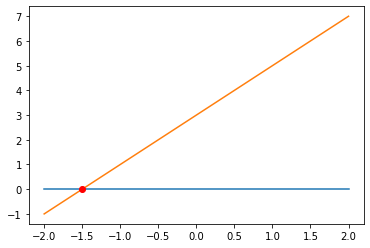

In [3]:
x = np.linspace(-2,2,1000)
y=2*x + 3 
y1 = x*0
plt.plot(x,y1)
plt.plot(x,y)

#Much Accurate Approach:

#first_line = LineString(np.column_stack((x,y1)))
#second_line = LineString(np.column_stack((x,y)))
#intersection = first_line.intersection(second_line)
#axis[0].plot(*intersection.xy, 'o')
#a,b=intersection.xy
#print(a,b)

#Not much accurate approach:
idx = np.argwhere(np.diff(np.sign(y1-y))).flatten()
plt.plot(x[idx], y1[idx], 'ro')
print(x[idx], y1[idx])

### Here we get the minima at $x=-1.5.$
### Now, Applying learn rate of 0.01 in the gradient_descent function

In [4]:
gradient_descent(gradient=lambda x: 2 * x + 3, init_=0, learn_rate=0.01)

-0.954

### Since, we are not getting the exact minima, increasing the learn rate
### Now, Applying learn rate of 0.1

In [5]:
gradient_descent(gradient=lambda x: 2 * x + 3, init_=0, learn_rate=0.1)

-1.5

### Here, we are getting the minima. So, the learn rate can be 0.1

#### <br><br><br>$(ii) x^4 - 3x^2 + 2x$<br>
#### &emsp;$\text{Gradient for the function is:}$<br>
### &emsp;$\frac{d(x^4 - 3x^2 + 2x)}{d(x)} = 4x^3 - 6x + 2$
### &emsp;Plotting the graph for $y = 4x^3 - 6x + 2$ and getting it's intersection with $y = 0$ to get the minima
### &emsp;$4x^3 - 6x + 2$ = 0 Hence, $x = 1, x = 0.207, x = -1.207

[-1.36603366  0.36602366  0.99999   ] [-0.  0.  0.]


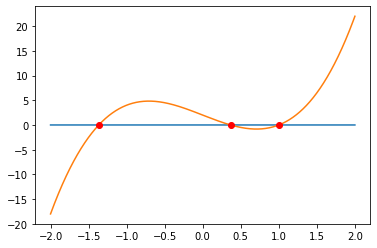

In [6]:
x = np.linspace(-2,2,100000)
y=4*x**3 - 6*x + 2
y1 = x*0
plt.plot(x,y1)
plt.plot(x,y)

#Much Accurate Approach:
#first_line = LineString(np.column_stack((x,y1)))
#second_line = LineString(np.column_stack((x,y)))
#intersection = first_line.intersection(second_line)
#axis[0].plot(*LineString(intersection).xy, 'o')
#a,b=LineString(intersection).xy
#print(a,b)

#Not much accurate approach:
idx = np.argwhere(np.diff(np.sign(y1-y))).flatten()
plt.plot(x[idx], y1[idx], 'ro')
print(x[idx], y1[idx])



### Here we get the optima or saddle points at $x=-1.366, x = 0.366, x = 1$
### for $x = -1.366$ : $y = (-1.366)^4 - 3(-1.366)^2 + 2(-1.366) = -4.848$
### for $x = 0.366$ : $y = (0.366)^4 - 3(0.366)^2 + 2(0.366) = 0.348$
### for $x = 1$ : $y = (1)^4 - 3(1)^2 + 2(1) = 0$
### So, we have a global minima at $x = -1.366$
### Now, Applying learn rate of 0.001 in the gradient_descent function

In [7]:
gradient_descent(gradient=lambda x: 4*(x**3) - 6*x +2, init_=-1, learn_rate=0.001)

-1.167

### Since, we are not getting the exact minima, increasing the learn rate
### Now, Applying learn rate of 0.01

In [8]:
gradient_descent(gradient=lambda x: 4*(x**3) - 6*x +2, init_=-1, learn_rate=0.01)

-1.366

### Here, we are getting the minima. So, the learn rate can be 0.01
### Also Note that if learn rate is greater than 0.237, we get overflow error<br><br>

# Q1. (b)
## &emsp;Write a gradient function to calculate gradients for a linear regression $y = ax + b$
### &emsp;The following gradient function returns the partial derivative of the MSE with respect to a and b
## &emsp;$mse = \frac{1}{n}\sum_{i=1}^n(y_i - y_{predicted})^2 = \frac{1}{n}\sum_{i=1}^n(y_i - (ax_i + b))^2$ 
### &emsp;Now,
## &emsp;$\frac{\partial (mse)}{\partial a} = -\frac{2}{n}\sum_{i=1}^nx_i(y_i - (ax_i + b))$
### &emsp;and
## &emsp;$\frac{\partial (mse)}{\partial b} = -\frac{2}{n}\sum_{i=1}^n(y_i - (ax_i + b))$

In [9]:
def gradient(x,y,a,b):
    #calculating the predicted y value
    y_pred = a*x + b
    n = len(x)
    #getting the partial derivative values of mse with respect to a and b
    der_a = -(2/n)*sum(x*(y-y_pred))
    der_b = -(2/n)*sum((y-y_pred))
    #returning the partial derivatives 
    return [der_a,der_b]

# Q1. (c)
## &emsp;Generate artificial data for this regression according to the given protocol
### &emsp;&emsp;Defining the gradient_descent function for getting the optimal a and b
### &emsp;&emsp;gradient_descent function below will update the values of a and b as follows
## &emsp;&emsp;$a_{t+1} = a_t - learn rate * \frac{\partial (mse)}{\partial a}$
## &emsp;&emsp;$b_{t+1} = b_t - learn rate * \frac{\partial (mse)}{\partial b}$

In [10]:
def gradient_descent(x,y,learn_rate, n_iter=50, tol=1e-06):
    #inititalizing the current a and b
    curr_a = 0
    curr_b = 0
    #iterating through following code for number of iterations
    for  i in range(n_iter):
        #calculating the change to be made to current a and b 
        a_delta = -learn_rate*gradient(x,y,curr_a,curr_b)[0]
        b_delta = -learn_rate*gradient(x,y,curr_a,curr_b)[1]
        #break out of loop if change is less than tolerated change
        if np.all(np.abs(a_delta) <= tol):
            break
        #updating current a and b
        curr_a += a_delta
        curr_b += b_delta
    #returning the optimal a and b values
    return [round(curr_a*10)/10,round(curr_b*10)/10]

### &emsp;&emsp;The following protocol is to be used to generate artificial data

In [11]:
np.random.seed(0)
x = 2.5*np.random.randn(10000) + 1.5
res = 1.5*np.random.randn(10000)
y = 2 + 0.3 * x + res

### &emsp;&emsp;Running the gradient_descent function to get values for a and b

In [12]:
a,b = gradient_descent(x,y,0.1)
print(a,b)

0.3 2.0


# Q1. (d)
## &emsp;Implement minibatch stochastic gradient descent using the code base you have developed so far
### &emsp;&emsp;Mini-Batch Stochastic Gradient Descent Function for finding optimal a and b
## &emsp;&emsp;$a_{t+1} = a_t - learn rate * \frac{\partial (mse)}{\partial a}$
## &emsp;&emsp;$b_{t+1} = b_t - learn rate * \frac{\partial (mse)}{\partial b}$

In [13]:
def mb_gradient_descent(x,y,learn_rate,mb_size,n_iter, tol=1e-06):
    #current a and b values
    curr_a = curr_b = 0
    #list of cost for each iteration
    cost=[]
    #taking x and y samples
    x_sam = np.ones(mb_size)
    y_sam = np.ones(mb_size)
    #iterating through the number of iterations passed in function arguments
    for i in range(n_iter):
        #iterating through the batch size
        for k in range(mb_size):
            #taking a random index
            random_index =np.random.randint(0,len(x)-1)
            #getting the sample values of x and y at random index
            x_sam[k] = x[random_index]
            y_sam[k] = y[random_index]
        #calculating the predicted y for current a and b
        y_pred = curr_a*x_sam + curr_b
        #calculating a_delta and b_delta which are the changes to be made in the current a and b to get the updated a and b
        a_delta = -learn_rate*gradient(x_sam,y_sam,curr_a,curr_b)[0]
        b_delta = -learn_rate*gradient(x_sam,y_sam,curr_a,curr_b)[1]
        #inserting the cost for current a and b in the cost list
        cost.append((1/mb_size)*sum([val**2 for val in (y_sam-y_pred)]))
        #break out of loop if the delta values for a and b are less than the tolerated change
        if np.all(np.abs(a_delta) <= tol and np.abs(b_delta) <= tol):
            break
        #updating the current a and b
        curr_a += a_delta
        curr_b += b_delta
    #returning the optimal a, b and the cost list
    return [round(curr_a*10)/10,round(curr_b*10)/10,cost]

### &emsp;Using the defined function mb_gradient_descent for getting the optimal a and b values for the given data 
### &emsp;with learning rate = 0.001, number of iterations = 5000 and batch size = 100

In [14]:
a,b,cost = mb_gradient_descent(x, y, 0.001,100,n_iter=5000)
print(a,b)

0.3 2.0


# Q1. (e)
## &emsp;Does SGD do better or worse in terms of time performance on our data?
## &emsp;Is there an optimal minibatch size that works best? Quantify and interpret your findings


### &emsp;&emsp;Creating a list of all the $2^i$ for all i in $0$ to $13$ and appending $10000$ at it's end
### &emsp;&emsp;This list gives us the batch sizes we will consider to evaluate the performance of Mini-Batch SGD
### &emsp;&emsp;Also, Here when we put $i = 0$, we get $2^i = 1$ which works as SGD
### &emsp;&emsp;And, When we consider the last value in the list $(10000)$, we get system that works as GD, Since we are considering all samples


In [15]:
list_batch_size = [2**i for i in range(14)]
list_batch_size.append(10000)
list_batch_size

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 10000]

### &emsp;&emsp;Running the minibatch gradient descent function for each value in the list formed above (list_batch_size) and 
### &emsp;&emsp;Considering fixed number of iterations to be 1000 and learning rate to be 0.03

In [16]:
loss=[]
timels=[]
for i in list_batch_size:
    #getting time before running function
    s = time()
    #creating the variable with the number of iterations
    n_iter = 1000
    #Getting the a,b nd cost variables returned by the function
    a,b,cost=mb_gradient_descent(x,y,0.03,i,n_iter)
    #appending the average cost for each batch size 
    loss.append((1/n_iter)*sum(cost))
    #getting the function execution time for each batch size
    timels.append(time()-s)
print(timels,loss)

[0.04548454284667969, 0.04584980010986328, 0.048868656158447266, 0.06838512420654297, 0.08679866790771484, 0.15996074676513672, 0.24038958549499512, 0.48855137825012207, 0.9227261543273926, 1.9421894550323486, 3.6219851970672607, 7.478414297103882, 15.482229948043823, 33.89618992805481, 39.72303605079651] [4.205367463203399, 2.832384635587048, 2.501090638410942, 2.3443004374828584, 2.3158653384452412, 2.3013998245712397, 2.2728928514634887, 2.2471295861922385, 2.2561317173787216, 2.254595117490152, 2.2544260247896424, 2.2565189022823873, 2.2556333445421646, 2.25496040862261, 2.25644307210236]


### &emsp;&emsp;Plotting the graphs

Text(0, 0.5, 'Time-Taken')

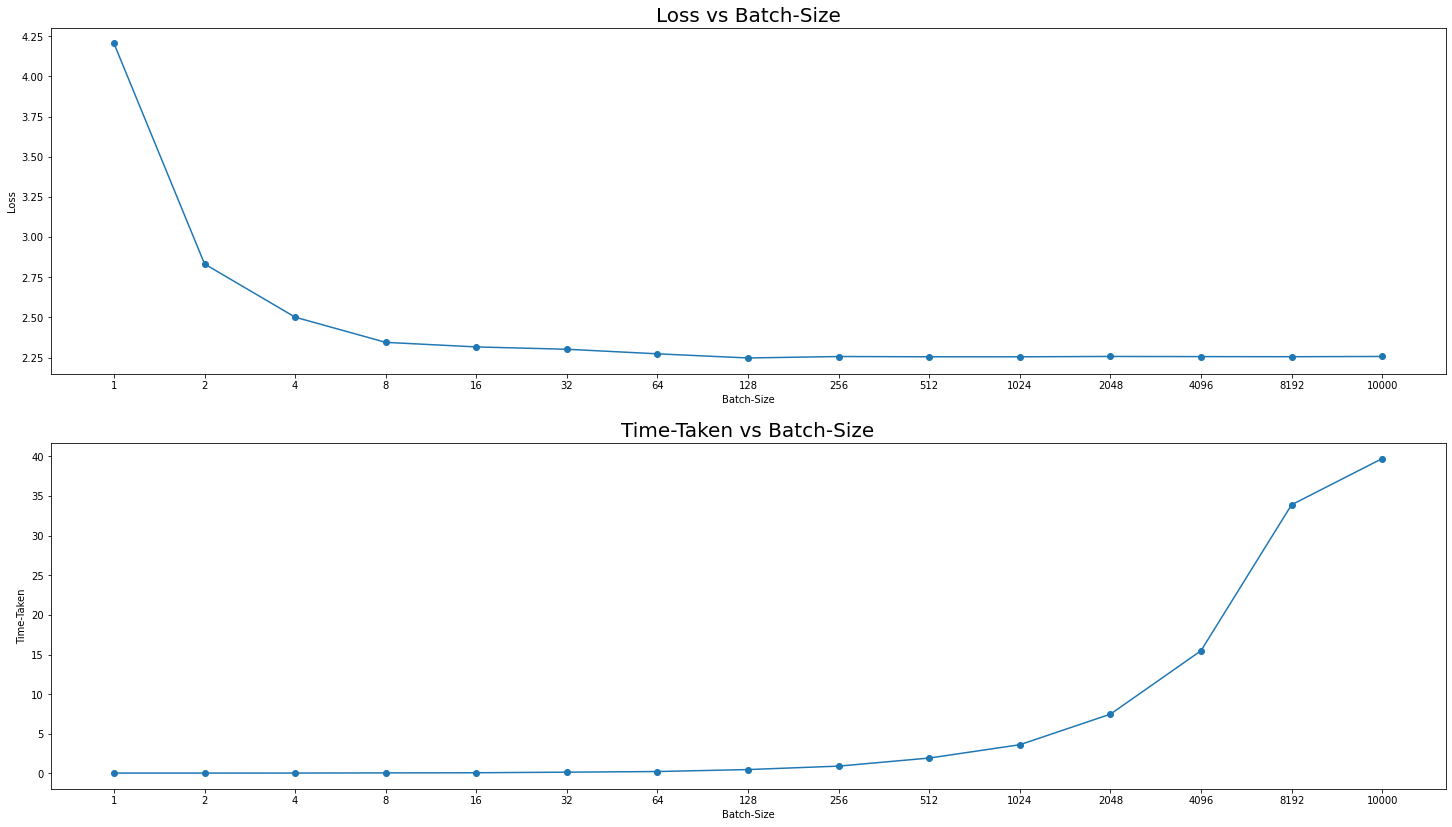

In [17]:
#getting list of all indices for all batch sizes
ind=list(range(15))
#getting the batch size values for each index above
lsstr = []
for i in range(len(list_batch_size)):
    lsstr.append(str(list_batch_size[i]))
#plotting the loss vs batch-size graph
plt.rcParams['figure.figsize']=[25,14]
figure, axis = plt.subplots(2,1)
#plt.rcParams['figure.figsize']=[25,14]
plt.sca(axis[0])
plt.xticks(ind,lsstr)
axis[0].set_title('Loss vs Batch-Size', size = '20')
axis[0].plot(ind,loss,'o-')
axis[0].set_xlabel('Batch-Size')
axis[0].set_ylabel('Loss')

#plotting the time-taken vs batch-size graph
plt.sca(axis[1])
plt.xticks(ind,lsstr)
axis[1].set_title('Time-Taken vs Batch-Size', size = '20')
axis[1].plot(ind,timels,'o-')
axis[1].set_xlabel('Batch-Size')
axis[1].set_ylabel('Time-Taken')

### &emsp;&emsp;In above graphs:
### &emsp;&emsp;When we have batch-size = 1, we get SGD
### &emsp;&emsp;And, When we consider batch-size = 10000, we get GD, since we are considering all samples
### &emsp;&emsp;And, Rest are batch-sizes for Mini-Batch SGD
### &emsp;&emsp;From the above two graphs, We can say that SGD works fastest in comparision with Mini-Batch SGD and GD. 
### &emsp;&emsp;However, the accuracy given by SGD is least in comparision with Mini-Batch SGD and GD. 
### &emsp;&emsp;Also, the execution time order will be:
$
SGD\;<\;Mini-Batch\;SGD\;<\;GD
$
### &emsp;&emsp;And, the accuracy order will also be:
$
SGD\;<\;Mini-Batch\;SGD\;<\;GD
$
***
<br><br><br>

**<h1 style="text-align:center"><font size = "15" >Q2</font></h1>**

***
$\mathbf{(i)}$&emsp;$\mathbf{\text{The probability that someone has both cold and a fever:}}$<br><br>
&emsp;&emsp;&emsp;$P(Cold, Fever) \text{ is the probability that someone has both Cold and Fever}$<br><br>
&emsp;&emsp;&emsp;$P(Fever|Cold) \text{ is the probability that someone has Fever, given that he/she has Cold}$<br><br>
&emsp;&emsp;&emsp;$P(Cold) \text{ is the probability that someone has Cold}$<br><br>
$
P(Cold, Fever) = P(Fever|Cold)P(Cold)
$
$
P(Cold, Fever) = 0.307 * 0.02
$
$
P(Cold, Fever) = 0.00614
$
<br><br><br><br><br>

$\mathbf{(ii)}$&emsp;$\mathbf{\text{The probability that someone who has a cough has a cold:}}$<br><br>
&emsp;&emsp;&emsp;$P(LungD) \text{ is the probability that someone has Lung Disease}$<br><br>
&emsp;&emsp;&emsp;$P(LungD|Sm) \text{ is the probability that someone has Lung Disease, given that he/she Smokes}$<br><br>
&emsp;&emsp;&emsp;$P(Cold|Cough) \text{ is the probability that someone has Cold, given that he/she has Cough}$<br><br>
&emsp;&emsp;&emsp;$P(Cold,Cough) \text{ is the probability that someone who has both Cough and Cold}$<br><br>
&emsp;&emsp;&emsp;$P(Sm') \text{ is the probability that someone does not Smoke}$<br><br>
&emsp;&emsp;&emsp;$P(Cough,Cold,LungD) \text{ is the probability that someone has Cough, Cold and Lung Disease}$<br><br>
&emsp;&emsp;&emsp;$P(Cold,Cough,LungD') \text{ is the probability that someone has Cough, Cold but not Lung Disease}$<br><br>
&emsp;&emsp;&emsp;$P(Cold',Cough,LungD) \text{ is the probability that someone has Cough, Lung Disease but not Cold}$<br><br>
&emsp;&emsp;&emsp;$P(Cold',Cough,LungD') \text{ is the probability that someone has Cough but no Cold and no Lung Disease}$<br><br><br><br>
&emsp;&emsp;&emsp;$P(Cold,LungD) = P(Cold) * P(LungD)\text{ Since, Cold and LungD are independent }$<br><br>
&emsp;&emsp;&emsp;$P(Cold',LungD) = P(Cold') * P(LungD)\text{ Since, Cold' and LungD are independent }$<br><br>
&emsp;&emsp;&emsp;$P(Cold,LungD') = P(Cold) * P(LungD')\text{ Since, Cold and LungD' are independent }$<br><br>
&emsp;&emsp;&emsp;$P(Cold',LungD') = P(Cold') * P(LungD')\text{ Since, Cold' and LungD' are independent }$<br><br>
$
P(LungD) = P(LungD|Sm)P(Sm) + P(LungD|Sm')P(Sm')
$
$
P(LungD) = 0.1009 * 0.2 + 0.001 * 0.8
$
$
P(LungD) = 0.02098
$
$
P(Cold|Cough) = \Bigg[\frac{P(Cough, Cold)}{P(Cough)}\Bigg]
$
$
P(Cold|Cough) = \Bigg[\frac{P(Cough,Cold,LungD) + P(Cold,Cough,LungD')}{P(Cough,Cold,LungD) + P(Cold',Cough,LungD) + P(Cold,Cough,LungD') + P(Cold',Cough,LungD')}\Bigg]
$
$
P(Cold|Cough) = \Bigg[\frac{P(Cough|Cold,LungD)*P(Cold,LungD) + P(Cough|Cold,LungD')*P(Cold,LungD')}{P(Cough|Cold,LungD)*P(Cold,LungD) + P(Cough|Cold',LungD)*P(Cold',LungD) + P(Cough|Cold,LungD')*P(Cold,LungD') + P(Cough|Cold',LungD')*P(Cold',LungD')}\Bigg]
$
$
P(Cold|Cough) = \Bigg[\frac{0.7525*0.02098*0.02 + 0.505*0.02*(1-0.02098)}{0.7525*0.02098*0.02 + 0.505*(1-0.02)*0.02098 + 0.505*0.02*(1-0.02098) + 0.01*(1-0.02)*(1-0.02098)}\Bigg]
$
$
P(Cold|Cough) = \Bigg[\frac{0.0003 + 0.0098}{0.0003 + 0.0103 + 0.0098 + 0.0095}\Bigg]
$
$
P(Cold|Cough) = 0.3377
$
***
<br><br><br>


**<h1 style="text-align:center"><font size = "15" >Q3</font></h1>**
<h3 style="text-align:center">Derive the MLE for the parameters of a k-sided multinomial distribution</h1>

***

### If an observation is
$
\LARGE p_1 \;=\; p(X_1) \;=\; \frac{x_1}{n}
$
$
\LARGE \,.\,.\,.\,
$
$
\LARGE p_m \;=\; p(X_m) \;=\; \frac{x_m}{n}
$
### then the likelihood which can be described as joint probability is 
$
\LARGE L(p) \;=\; {n \choose {x_1,...,x_m}}\prod_{k\;=\;1}^m\,{p_k^{x_k}}
$
$
\LARGE \;=\; n!\,\prod_{k\;=\;1}^m\,\frac{p_k^{x_k}}{x_k!}
$
### and the log-likelihood is
$
\LARGE l(p) \;=\; log\;L(p) \;=\; log\; \Bigg(n!\,\prod_{k\;=\;1}^m \,\frac{{p_k^{x_k}}}{x_k!}  \Bigg)
$
$
\LARGE \;=\; log\;n! \;+\; log \;\prod_{k\;=\;1}^m \,\frac{{p_k^{x_k}}}{x_k!}
$
$
\LARGE \;=\; log\;n! \;+\; \sum_{k\;=\;1}^m\,log \; \frac{{p_k^{x_k}}}{x_k!}
$
$
\LARGE \;=\; log\;n! \;+\; \sum_{k\;=\;1}^m\,x_k\,log \;p_k \;-\; \sum_{k\;=\;1}^m\,log \;{x_k!}
$
### Posing a constraint $\LARGE(\sum_{k\;=\;1}^m\,p_k \;=\; 1)$ with Lagrange multiplier
$
\LARGE l'(p,\lambda) \;=\; l(p) \;+\; \lambda \Bigg( 1\;-\;\sum_{k\;=\;1}^m\,p_k \Bigg)
$
### To find $arg\,max_p\;L(p,\lambda)$
$
\LARGE \frac{\partial}{\partial p_k}\,l'(p,\lambda) \;=\; \frac{\partial}{\partial p_k}\,l(p) \;+\; \frac{\partial}{\partial p_k}\, \lambda \Bigg( 1 \;-\; \sum_{k\;=\;1}^m\,p_k \Bigg)\;=\;0
$
$
\LARGE \frac{\partial}{\partial p_k}\,\sum_{k\;=\;1}^m\,x_k\,log\;p_k \;-\; \lambda\,\frac{\partial}{\partial p_k}\,\sum_{k\;=\;1}^m\,p_k\;=\;0
$
$
\LARGE \frac{x_k}{p_k}\;-\;\lambda\;=\;0
$
$
\LARGE p_k\;=\;\frac{x_k}{\lambda}
$
### Thus,
$
\LARGE p_k\;=\;\frac{x_k}{n}
$
### because
$
\LARGE p_k\;=\;\frac{x_k}{\lambda}
$
$
\LARGE \sum_{k\;=\;1}^m\,p_k\;=\;\sum_{k\;=\;1}^m\,\frac{x_k}{\lambda}
$
$
\LARGE 1\;=\;\frac{1}{\lambda}\,\sum_{k\;=\;1}^m\,x_k
$
$
\LARGE \lambda\;=\;n
$
### Finally, the probability distribution that maximizes the likelihood of observing the data
$
\LARGE p\;=\;\Bigg( \frac{x_1}{n},\,.\,.\,.\,,\frac{x_m}{n} \Bigg)
$

***